In [1]:
# data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.cluster import KMeans
import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import os
from scipy.integrate import odeint
#change path to where 'manuscript_data' is saved
dir_path = '/home/antonio/Repositories/manuscript_data/'
sys.path.append(dir_path+'/code/utils/')
import operator_calculations as op_calc
import stats
plt.rc('text', usetex=True)
plt.rc('font',size=14)

In [2]:
k_B_T = 0.5
f = h5py.File(dir_path+'DoubleWell/simulations/simulation_k_B_T_{}.h5'.format(k_B_T),'r')
sim = np.array(f['simulation'])
T = np.array(f['MetaData/T'])[0]
discard_t = np.array(f['MetaData/discarded_t'])[0]
dt = np.array(f['MetaData/integration_step'])[0]
f.close()

In [3]:
f = h5py.File(dir_path+'DoubleWell/tscales_compute_1000_clusters.h5','r')
print(list(f.keys()))
T_range = np.array(list(f.keys()),dtype='float')
ts_traj_T = []
for T in T_range:
    ts_traj_delay = np.array(f[str(T)]['ts_traj_delay'])
    delay_range = np.array(f[str(T)]['delay_range'])
    length = int(np.array(f[str(T)]['seq_length'])[0])
    ts_traj_T.append(ts_traj_delay)
f.close()

print(length*dt)

['0.5', '0.75', '1.0', '1.25', '1.5', '1.75', '2.0', '2.25', '2.5']
50000.00074505806


In [4]:
n_modes=15
colors_modes = plt.cm.Blues_r(np.linspace(0,.9,n_modes))

In [5]:
exp_fit_tscales = [20.64015971, 19.20649937, 21.73854655] #in Fig3_BCD.ipynb

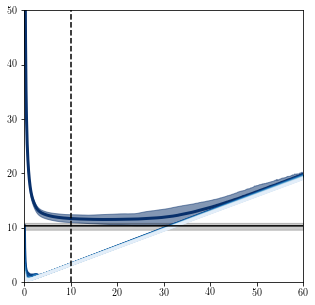

In [6]:
kt=0
ts_traj_delay = ts_traj_T[kt]
plt.figure(figsize=(5,5))
for mode in range(n_modes):
    mean = np.mean(ts_traj_delay[:,:,mode],axis=0)
    cil = np.percentile(ts_traj_delay[:,:,mode],2.5,axis=0)
    ciu = np.percentile(ts_traj_delay[:,:,mode],97.5,axis=0)
    plt.plot(delay_range*dt,mean,lw=3,c=colors_modes[mode])
    plt.fill_between(delay_range*dt,cil,ciu,alpha=.5,color=colors_modes[mode])
plt.plot(delay_range*dt,np.ones(len(delay_range))*exp_fit_tscales[0]/2,c='k')
plt.fill_between(delay_range*dt,np.ones(len(delay_range))*exp_fit_tscales[1]/2,np.ones(len(delay_range))*exp_fit_tscales[2]/2,color='k',alpha=.2)

plt.axvline(10,c='k',ls='--')
plt.ylim(0,50)
plt.xlim(0,60)
# plt.savefig('tscales_DW_T=0.5.pdf')
plt.show()

In [7]:
#compute noise floor
k_B_T=0.5
f = h5py.File(dir_path+'DoubleWell/symbol_sequences/labels_phspace_k_B_T_{}_nseeds_1000.h5'.format(k_B_T),'r')
labels = ma.array(f['labels_traj'],dtype=int)
centers = np.array(f['centers_traj'])
f.close()
n_times=100
print(length)
max_eig_random = np.zeros(n_times)
for k in range(n_times):
    random_labels = np.random.choice(labels,length,replace=False)
    P_random = op_calc.transition_matrix(random_labels,1)
    R_random = op_calc.get_reversible_transition_matrix(P_random)
    eigvals_random,eigvecs = op_calc.sorted_spectrum(R_random,k=2)
    max_eig_random[k] = np.min(eigvals_random.real)
    if k%5==0:
        print(k)
    

1000000
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [8]:
kt=0
ts_traj_delay = ts_traj_T[kt]

eigvals_traj_delay = np.copy(ts_traj_delay)
for traj_idx in range(ts_traj_delay.shape[0]):
    eigvals_traj_delay[traj_idx,:,:] = np.exp(-(delay_range*dt)/ts_traj_delay[traj_idx,:,:].T).T

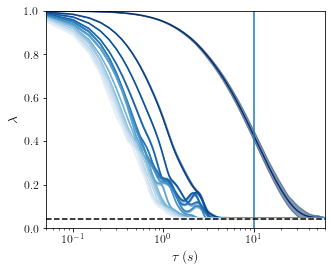

In [9]:
n_modes=15
plt.figure(figsize=(5,4))
for mode in range(n_modes):
    mean = np.mean(eigvals_traj_delay[:,:,mode],axis=0)
    cil = np.percentile(eigvals_traj_delay[:,:,mode],2.5,axis=0)
    ciu = np.percentile(eigvals_traj_delay[:,:,mode],97.5,axis=0)
#     mean,cil,ciu=stats.bootstrap(eigvals_traj_delay[:,:,mode],median=False,n_times=1000)
    plt.plot(delay_range*dt,mean,c=colors_modes[mode])
    plt.fill_between(delay_range*dt,cil,ciu,alpha=.5,color=colors_modes[mode])
#     plt.plot(delay_range*dt,np.exp(-(delay_range*dt)/np.mean(ts_traj_delay,axis=0)[:,mode]),c=colors_modes[mode],marker='o',ms=3)
# plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\tau \,(s)$',fontsize=14)
plt.ylabel(r'$\lambda$',fontsize=14)
plt.ylim(0,1)
plt.xlim(5e-2,6e1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(10)
plt.axhline(max_eig_random.mean(),c='k',ls='--')
# plt.savefig('eigvals_DW_T=0.5.pdf')
plt.show()


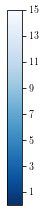

In [10]:
import pylab as pl
import numpy as np

a = np.array([[0,1]])
pl.figure(figsize=(.25, 4.5))
img = pl.imshow(a, cmap="Blues_r",vmin=0,vmax=15)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(cax=cax,ticks=np.arange(1,16,2))
# pl.savefig("colorbar_mode_range.pdf")

In [11]:
# n_modes = ts_traj_T[0].shape[2]
# Tmin=0
# scaled_T = (T_range - Tmin) / T_range.ptp()

# n_modes = ts_traj_delay.shape[2]

# colors_ = plt.cm.Reds(scaled_T)

# delay_idx_min_T = []
# for kt in range(len(ts_traj_T)):
#     ts_traj_delay = ts_traj_T[kt]

#     eigvals_traj_delay = np.copy(ts_traj_delay)
#     for traj_idx in range(ts_traj_delay.shape[0]):
#         eigvals_traj_delay[traj_idx,:,:] = np.exp(-(delay_range*dt)/ts_traj_delay[traj_idx,:,:].T).T

#     part_ratio_traj = np.zeros(eigvals_traj_delay.shape[:2])
#     for traj_idx in range(ts_traj_delay.shape[0]):
#         part_ratio_traj[traj_idx] = (np.sum(eigvals_traj_delay[traj_idx],axis=1)**2/np.sum(eigvals_traj_delay[traj_idx]**2,axis=1))/n_modes

# #     mean,cil,ciu = stats.bootstrap(part_ratio_traj,n_times=1000)
#     mean = np.mean(part_ratio_traj,axis=0)
#     cil = np.percentile(part_ratio_traj,2.5,axis=0)
#     ciu = np.percentile(part_ratio_traj,97.5,axis=0)
    
#     plt.plot(delay_range*dt,mean,label='T = {:.2f}'.format(T_range[kt]),c=colors_[kt])
#     plt.fill_between(delay_range*dt,cil,ciu,alpha=.5,color = colors_[kt])
#     print(delay_range[np.argmin(mean)]*dt)
#     delay_idx_min_T.append(np.argmin(mean))
# # plt.legend(fontsize=12)
# plt.xlabel('delay (s)',fontsize=14)
# plt.ylabel('participation ratio',fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.xscale('log')
# plt.xlim(delay_range[0]*dt,delay_range[-1]*dt)
# # plt.savefig('participation_ratio_DW_log_time.pdf')
# plt.show()
    

In [12]:
# plt.figure(figsize=(5,5))

# for kt in range(len(T_range)):
#     ts_traj_delay = ts_traj_T[kt]
#     mode = 0
#     mean = np.mean(np.diff(ts_traj_delay[:,:,mode],axis=1),axis=0)/dt
#     cil = np.percentile(np.diff(ts_traj_delay[:,:,mode],axis=1),2.5,axis=0)/dt
#     ciu = np.percentile(np.diff(ts_traj_delay[:,:,mode],axis=1),97.5,axis=0)/dt
#     plt.plot(delay_range[:-1]*dt,mean,lw=3,c=colors_[kt])
#     plt.fill_between(delay_range[:-1]*dt,cil,ciu,alpha=.5,color=colors_[kt])
#     plt.axhline(0,ls='--',c='k')
#     plt.xlim(dt,10)
# plt.xscale('log')
# plt.xlabel(r'$\tau$',fontsize=14)
# plt.ylabel(r'$d t_{imp}/d\tau$',fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# # plt.savefig('tscales_deriv_log.pdf')

# plt.show()

In [13]:
# plt.figure(figsize=(5,5))

# for kt in range(len(T_range)):
#     ts_traj_delay = ts_traj_T[kt]
#     #     mean,cil,ciu=stats.bootstrap(ts_traj_delay[:,:,mode],median=False,n_times=100)
#     mode = 0
#     mean = np.mean(np.diff(ts_traj_delay[:,:,mode],axis=1),axis=0)
#     cil = np.percentile(np.diff(ts_traj_delay[:,:,mode],axis=1),2.5,axis=0)
#     ciu = np.percentile(np.diff(ts_traj_delay[:,:,mode],axis=1),97.5,axis=0)
#     plt.plot(delay_range[:-1]*dt,mean,lw=3,c=colors_[kt])
#     plt.fill_between(delay_range[:-1]*dt,cil,ciu,alpha=.5,color=colors_[kt])
#     # plt.xscale('log')
#     # plt.yscale('log')
#     # plt.axhline(np.mean(ts_traj_delay[:,:,0],axis=0)[120],c='k',ls='--')
#     # plt.ylim(0,60)
#     plt.axhline(0,ls='--',c='k')
#     plt.xlim(dt,1.5)
# plt.xscale('log')
# plt.xlabel(r'$\tau$',fontsize=14)
# plt.ylabel(r'$d t_{imp}/d\tau$',fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# # plt.savefig('tscales_deriv_not_dt_log.pdf')

# plt.show()